In [2]:
 #!pip install imblearn 

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [165]:
pd.set_option('display.max_columns',36)

In [166]:
firstimport = pd.read_csv (r'C:\Users\drdia\Desktop\proiect Crystal\data_predicted.csv')
print(firstimport)

        Unnamed: 0                       campaign_id  campaign_payout  clicks  \
0            31879  0ebf9a5749597f71386aa6c6662c3bcf         2.210541       3   
1            31940  0ebf9a5749597f71386aa6c6662c3bcf         2.210541       3   
2            32360  0ebf9a5749597f71386aa6c6662c3bcf         2.210541       3   
3            32363  0ebf9a5749597f71386aa6c6662c3bcf         2.210541       3   
4            32465  0ebf9a5749597f71386aa6c6662c3bcf         2.210541       3   
...            ...                               ...              ...     ...   
115649      216562  58c5d76ee86b9ad6a7abf82e158b557f         0.190098   57347   
115650      216563  58c5d76ee86b9ad6a7abf82e158b557f         0.190098   57353   
115651      216564  58c5d76ee86b9ad6a7abf82e158b557f         0.190098   57357   
115652      216565  58c5d76ee86b9ad6a7abf82e158b557f         0.190098   63175   
115653      568441  dabe8348f134d5e5115a49b9bc9ef7fb         0.388754  143589   

        conversions  revenu

In [167]:
firstimport.describe()

,Unnamed: 0,campaign_payout,clicks,conversions,revenue,lp_clicks,cpc,prev_cpc,cost,impressions,widget_numeric_id,traffic_source_numeric_id,widget_numeric_id_category,traffic_source_numeric_id_category,lpctr,payout,net,TR.ROI,EPC,train_clicks,train_npc,train_roi,train_ctr,train_payout
count,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,1.156540e+05,1.156540e+05,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000,115654.000000
mean,330791.822375,16.706567,1690.222621,43.495876,410.724396,287.673535,5.561458,5.456388,366.203683,5.206290e+05,7.010461e+05,8.901897,72709.909195,1.585254,0.163274,16.282145,44.520713,5.322413,0.570918,1690.222621,0.400845,5.322413,0.547873,16.282145
std,196569.237657,22.678787,8202.300880,376.091370,4031.909551,1815.457603,8.107772,8.015966,4313.664706,5.676842e+06,3.235050e+05,2.755103,35591.106428,1.022352,0.174371,20.916898,1090.965160,170.509421,2.138706,8202.300880,2.132068,170.509421,0.495302,20.916898
min,91.000000,0.053529,3.000000,1.000000,0.180000,0.000000,0.000000,0.000000,0.004000,0.000000e+00,2.490000e+02,6.000000,13.000000,0.000000,0.000000,0.173228,-103911.630000,-0.998256,0.000083,3.000000,-29.914876,-0.998256,0.000007,0.173228
25%,153008.250000,1.570766,50.000000,2.000000,7.000000,0.000000,0.250000,0.245000,4.580000,0.000000e+00,4.546200e+05,7.000000,44107.000000,1.000000,0.000000,1.506667,-2.450000,-0.181246,0.068571,50.000000,-0.014868,-0.181246,0.003292,1.506667
50%,320637.500000,3.962121,231.000000,5.000000,40.000000,22.000000,1.990000,1.950000,23.950000,0.000000e+00,8.091310e+05,9.000000,81599.000000,2.000000,0.132019,4.000000,6.040000,0.550388,0.185185,231.000000,0.050000,0.550388,1.000000,4.000000
75%,500729.750000,30.018304,922.000000,16.000000,169.000000,114.000000,9.600000,9.340000,111.714000,8.457575e+04,9.714810e+05,9.000000,101226.000000,2.000000,0.237288,31.000000,53.780000,2.099212,0.426730,922.000000,0.215400,2.099212,1.000000,31.000000
max,655522.000000,508.823129,991945.000000,26257.000000,401442.000000,81951.000000,130.060000,130.060000,429786.110000,5.007547e+08,1.129824e+06,21.000000,138440.000000,5.000000,1.000000,87.000000,106817.340000,43899.000000,128.000000,991945.000000,127.680000,43899.000000,1.000000,87.000000


In [168]:
firstimport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115654 entries, 0 to 115653
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          115654 non-null  int64  
 1   campaign_id                         115654 non-null  object 
 2   campaign_payout                     115654 non-null  float64
 3   clicks                              115654 non-null  int64  
 4   conversions                         115654 non-null  int64  
 5   revenue                             115654 non-null  float64
 6   lp_clicks                           115654 non-null  int64  
 7   widget_id                           115654 non-null  object 
 8   cpc                                 115654 non-null  float64
 9   prev_cpc                            115654 non-null  float64
 10  datetime                            115654 non-null  object 
 11  cost                      

In [169]:
firstimport.isna().sum()

Unnamed: 0                            0
campaign_id                           0
campaign_payout                       0
clicks                                0
conversions                           0
revenue                               0
lp_clicks                             0
widget_id                             0
cpc                                   0
prev_cpc                              0
datetime                              0
cost                                  0
impressions                           0
widget_name                           0
traffic_source_name                   0
widget_numeric_id                     0
traffic_source_numeric_id             0
widget_numeric_id_category            0
traffic_source_numeric_id_category    0
lpctr                                 0
payout                                0
cw                                    0
net                                   0
TR.ROI                                0
EPC                                   0


In [170]:
firstimport.predictions_class.value_counts()

undefined     64873
stop          30718
no_changes    13918
decrease       5816
increase        329
Name: predictions_class, dtype: int64

In [171]:
firstimport.corr()

,Unnamed: 0,campaign_payout,clicks,conversions,revenue,lp_clicks,cpc,prev_cpc,cost,impressions,widget_numeric_id,traffic_source_numeric_id,widget_numeric_id_category,traffic_source_numeric_id_category,lpctr,payout,net,TR.ROI,EPC,train_clicks,train_npc,train_roi,train_ctr,train_payout
Unnamed: 0,1.000000,0.022913,0.028628,-0.019434,0.002357,0.009028,-0.141157,-0.140929,0.001080,0.014563,-0.037973,0.036925,-0.022572,-0.003101,-0.068671,0.018300,0.004439,-0.006141,-0.023379,0.028628,-0.016813,-0.006141,-0.061891,0.018300
campaign_payout,0.022913,1.000000,0.079302,-0.036862,0.093133,0.101472,-0.274662,-0.268955,0.068719,0.068949,0.321941,-0.336116,0.312119,-0.417275,0.101305,0.938046,0.072479,0.024384,0.202819,0.079302,0.174089,0.024384,-0.443869,0.938046
clicks,0.028628,0.079302,1.000000,0.373397,0.519126,0.680056,-0.064834,-0.062971,0.498463,0.395189,-0.007373,0.012229,-0.004716,-0.007344,0.008183,0.088211,-0.052366,-0.005956,-0.031596,1.000000,-0.036197,-0.005956,-0.042183,0.088211
conversions,-0.019434,-0.036862,0.373397,1.000000,0.345787,0.298633,0.015322,0.016667,0.345352,0.269852,0.014236,-0.006069,0.014605,0.006302,-0.003753,-0.037816,-0.087585,-0.002764,-0.009914,0.373397,-0.016173,-0.002764,0.003636,-0.037816
revenue,0.002357,0.093133,0.519126,0.345787,1.000000,0.650377,-0.032572,-0.031697,0.968066,0.499688,0.035600,-0.027959,0.039407,-0.038821,0.059515,0.102985,-0.131995,-0.001172,0.011813,0.519126,-0.005870,-0.001172,-0.084843,0.102985
lp_clicks,0.009028,0.101472,0.680056,0.298633,0.650377,1.000000,-0.043646,-0.042139,0.630978,0.442151,-0.024185,0.043079,-0.015172,0.035434,0.195247,0.112407,-0.091263,-0.004298,-0.014252,0.680056,-0.026990,-0.004298,-0.062541,0.112407
cpc,-0.141157,-0.274662,-0.064834,0.015322,-0.032572,-0.043646,1.000000,0.981698,-0.028625,-0.054533,-0.316816,0.268608,-0.368350,0.402085,0.027141,-0.287894,-0.007192,-0.012355,-0.025686,-0.064834,-0.031017,-0.012355,0.583851,-0.287894
prev_cpc,-0.140929,-0.268955,-0.062971,0.016667,-0.031697,-0.042139,0.981698,1.000000,-0.027524,-0.053950,-0.316102,0.269030,-0.367169,0.400237,0.032847,-0.281782,-0.008312,-0.012319,-0.026040,-0.062971,-0.031553,-0.012319,0.578829,-0.281782
cost,0.001080,0.068719,0.498463,0.345352,0.968066,0.630978,-0.028625,-0.027524,1.000000,0.502217,0.026422,-0.015762,0.032801,-0.018745,0.050875,0.075663,-0.376282,-0.002589,0.001420,0.498463,-0.022268,-0.002589,-0.071480,0.075663
impressions,0.014563,0.068949,0.395189,0.269852,0.499688,0.442151,-0.054533,-0.053950,0.502217,1.000000,0.061091,-0.052050,0.070120,-0.059498,0.030329,0.075697,-0.139050,-0.002701,-0.003469,0.395189,-0.017391,-0.002701,-0.101112,0.075697


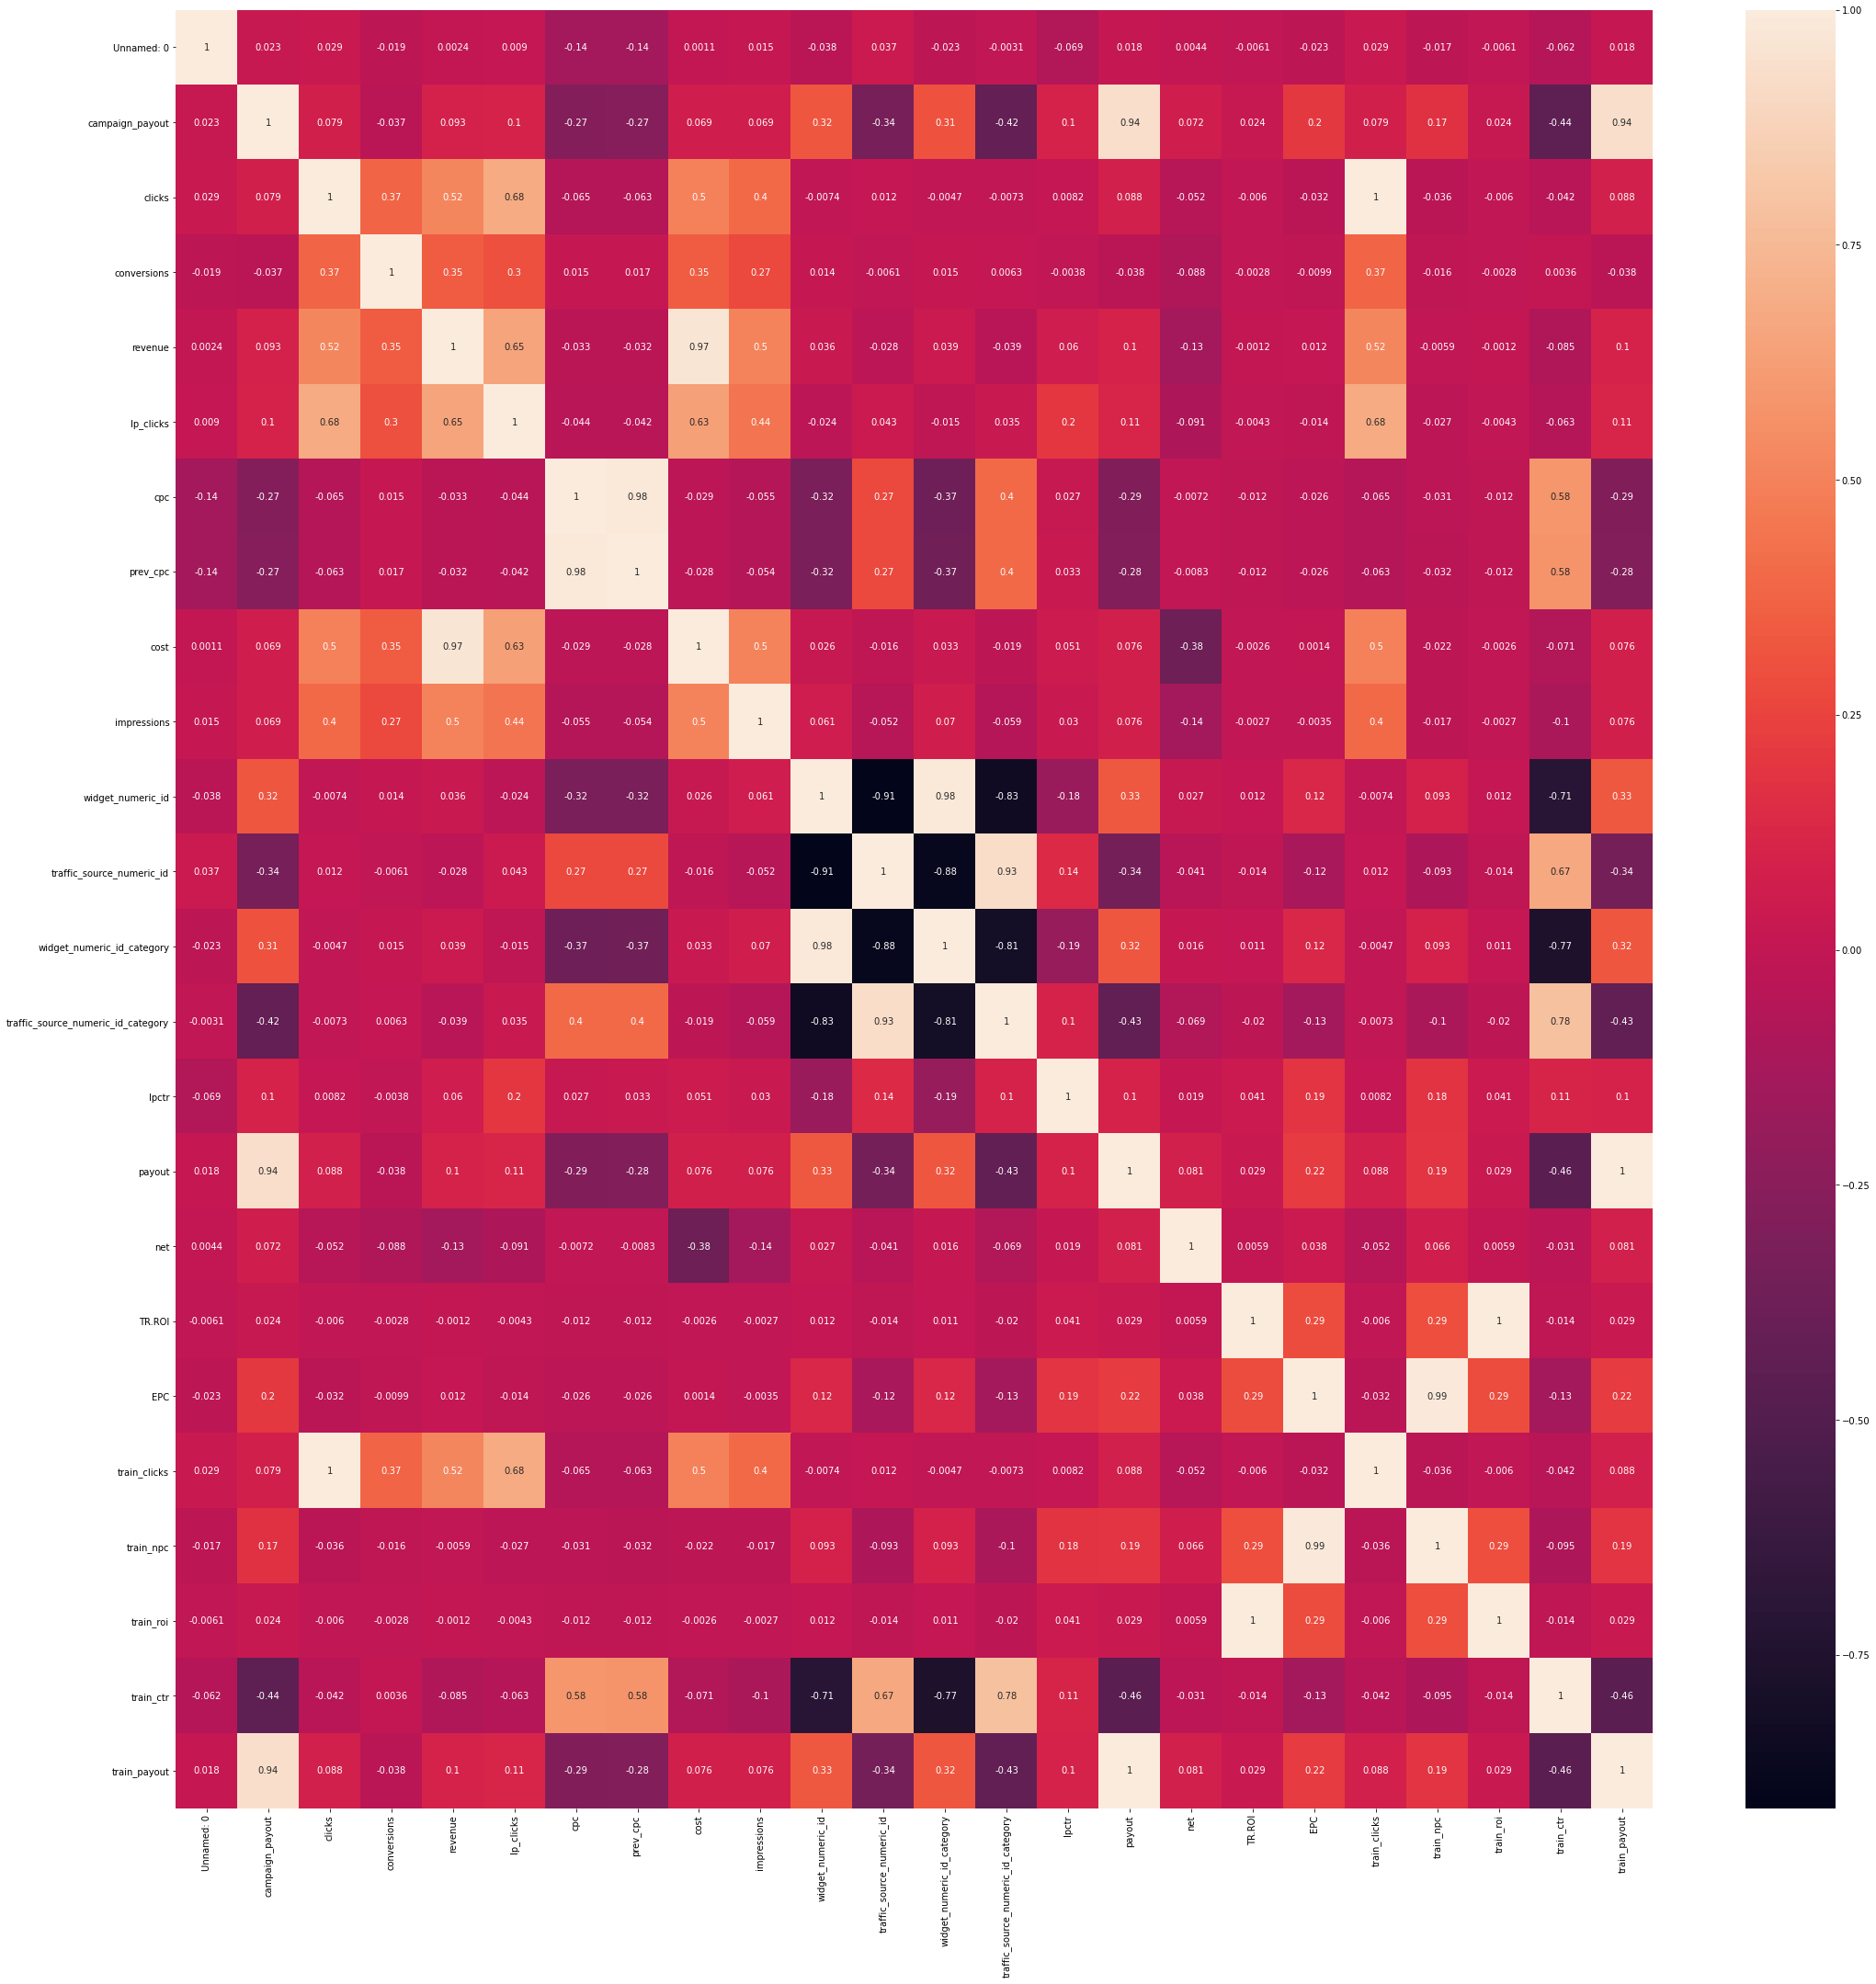

In [172]:
def plotCorr(firstimport):
    plt.figure(figsize=(36,36))
    sns.heatmap(firstimport.corr(), annot=True)
    plt.show()

plotCorr(firstimport)


In [174]:
print(firstimport.dtypes) 

Unnamed: 0                              int64
campaign_id                            object
campaign_payout                       float64
clicks                                  int64
conversions                             int64
revenue                               float64
lp_clicks                               int64
widget_id                              object
cpc                                   float64
prev_cpc                              float64
datetime                               object
cost                                  float64
impressions                             int64
widget_name                            object
traffic_source_name                    object
widget_numeric_id                       int64
traffic_source_numeric_id               int64
widget_numeric_id_category              int64
traffic_source_numeric_id_category      int64
lpctr                                 float64
payout                                float64
cw                                

In [175]:
secondimport= pd.DataFrame(firstimport)
secondimport.to_csv(r'C:\Users\drdia\Desktop\proiect Crystal\secondimport.csv' ,columns=['cw','traffic_source_name','payout','clicks','conversions','revenue','lp_clicks','cpc','prev_cpc','datetime','cost','impressions','lpctr','payout','net','TR.ROI','EPC','train_npc','train_ctr','predictions_class'],index=False)

In [176]:
secondimport = pd.read_csv (r'C:\Users\drdia\Desktop\proiect Crystal\secondimport.csv')
print(secondimport)

                                                       cw traffic_source_name  \
0       0ebf9a5749597f71386aa6c6662c3bcf875c6caadd4678...                Mgid   
1       0ebf9a5749597f71386aa6c6662c3bcf95a95a0208cb07...                Mgid   
2       0ebf9a5749597f71386aa6c6662c3bcfe6eca8b9662f0e...                Mgid   
3       0ebf9a5749597f71386aa6c6662c3bcfe73e596d6dec40...                Mgid   
4       0ebf9a5749597f71386aa6c6662c3bcff94a048d2ee764...                Mgid   
...                                                   ...                 ...   
115649  58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...                Mgid   
115650  58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...                Mgid   
115651  58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...                Mgid   
115652  58c5d76ee86b9ad6a7abf82e158b557ff5b3e874eea4a2...                Mgid   
115653  dabe8348f134d5e5115a49b9bc9ef7fbb973ada20b19f7...             Taboola   

          payout  clicks  c

In [177]:
data=secondimport[(secondimport.impressions>0) & (secondimport.clicks>4)]

In [178]:
def removeOutliers(dataFrame, zScoreTreshold):
    print(dataFrame.shape)
    numericalVariablesColumnsList = ["payout", "clicks", "conversions", "net", "TR.ROI", "EPC"]
    z = np.abs(stats.zscore(dataFrame[numericalVariablesColumnsList]))
    dataFrame_o = dataFrame[(z < zScoreTreshold).all(axis=1)]
    print(dataFrame_o.shape)
    return dataFrame_o

In [179]:
data_optimised = removeOutliers(data,3)

(51982, 20)
(50306, 20)


In [180]:
print(data_optimised)

                                                       cw traffic_source_name  \
1071    7619a84bae58b0f8d860c3a8aaefc5bc1fbf9baf4589bc...          RevContent   
1072    ede204841653c83854859ab0dd32f8206e98535b2bc331...          RevContent   
1073    36765849ff46ac565802886da1c2fabca5b75e36293736...          RevContent   
1074    413fa2e5cf4b9b84809bbd9711ca0b43f082df971fa065...          RevContent   
1075    8aace2b4b9b67c8d08f5d21511843dbc8abc72fa80c139...          RevContent   
...                                                   ...                 ...   
115062  f704df0ec88fd2aa9501ea5938c2d2c691b6c7fee06aed...             Taboola   
115070  3e6c9e40cb2fe22dfd7783b4cfb908207f5c154b184182...          RevContent   
115071  ab86e60144b4334a78921255313b8c320feea5d224bb9f...             Taboola   
115072  f704df0ec88fd2aa9501ea5938c2d2c69ba1f8cb377852...             Taboola   
115075  f704df0ec88fd2aa9501ea5938c2d2c69ba1f8cb377852...             Taboola   

          payout  clicks  c

In [181]:
data_optimised2=data_optimised.sort_values(['cw','datetime'],ascending=(True,False))

In [182]:
data_optimised3=data_optimised2.drop_duplicates(subset=['cw'])

In [183]:
data_optimised3.predictions_class.value_counts()

stop          7533
no_changes    6400
decrease      1381
undefined      334
increase       234
Name: predictions_class, dtype: int64

In [184]:
data_optimised3

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,cpc,prev_cpc,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class
61093,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,RevContent,31.000000,104,6,186.00,27,0.400,0.500,8/19/2020 13:00,23.800,30990,0.259615,31.000000,162.200,6.815126,1.788462,1.559615,0.003356,stop
26366,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,RevContent,32.000000,35,2,64.00,18,0.400,0.400,8/19/2020 13:00,12.900,82091,0.514286,32.000000,51.100,3.961240,1.828571,1.460000,0.000426,stop
78891,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,RevContent,32.000000,86,12,384.00,18,0.400,0.500,8/19/2020 14:00,21.280,26790,0.209302,32.000000,362.720,17.045113,4.465116,4.217674,0.003210,stop
79582,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,RevContent,31.000000,297,12,372.00,78,0.440,0.440,8/31/2020 20:00,71.000,315708,0.262626,31.000000,301.000,4.239437,1.252525,1.013468,0.000941,stop
101075,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,RevContent,31.428571,276,42,1320.00,158,0.440,0.420,8/31/2020 20:00,49.280,10926,0.572464,31.428571,1270.720,25.785714,4.782609,4.604058,0.025261,stop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,0.022,0.022,9/7/2020 11:00,0.280,3056,0.000000,0.181818,1.720,6.142857,0.117647,0.101176,0.005563,no_changes
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,0.022,0.022,9/7/2020 10:00,0.520,5438,0.000000,0.181818,1.480,2.846154,0.066667,0.049333,0.005517,no_changes
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,0.022,0.022,9/7/2020 17:00,0.190,350,0.000000,0.250000,0.060,0.315789,0.050000,0.012000,0.014286,no_changes
103748,fed3317f5afa90161a3ee69a6db8946af550cf21472a84...,Taboola,0.207547,133,53,11.00,0,0.022,0.022,9/7/2020 10:00,3.300,107192,0.000000,0.207547,7.700,2.333333,0.082707,0.057895,0.001241,no_changes


In [185]:
data=(data_optimised3)
data_div=data['cost']/data['clicks']
print(data_div)

61093     0.228846
26366     0.368571
78891     0.247442
79582     0.239057
101075    0.178551
            ...   
76346     0.016471
76440     0.017333
1214      0.038000
103748    0.024812
100831    0.333774
Length: 15882, dtype: float64


In [186]:
data_optimised4 = pd.concat([data_optimised3, data_div.reindex(data_optimised3.index)], axis=1)
data_optimised4 = data_optimised4.rename(columns={0: 'CPC'})
data_optimised4

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,cpc,prev_cpc,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC
61093,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,RevContent,31.000000,104,6,186.00,27,0.400,0.500,8/19/2020 13:00,23.800,30990,0.259615,31.000000,162.200,6.815126,1.788462,1.559615,0.003356,stop,0.228846
26366,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,RevContent,32.000000,35,2,64.00,18,0.400,0.400,8/19/2020 13:00,12.900,82091,0.514286,32.000000,51.100,3.961240,1.828571,1.460000,0.000426,stop,0.368571
78891,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,RevContent,32.000000,86,12,384.00,18,0.400,0.500,8/19/2020 14:00,21.280,26790,0.209302,32.000000,362.720,17.045113,4.465116,4.217674,0.003210,stop,0.247442
79582,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,RevContent,31.000000,297,12,372.00,78,0.440,0.440,8/31/2020 20:00,71.000,315708,0.262626,31.000000,301.000,4.239437,1.252525,1.013468,0.000941,stop,0.239057
101075,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,RevContent,31.428571,276,42,1320.00,158,0.440,0.420,8/31/2020 20:00,49.280,10926,0.572464,31.428571,1270.720,25.785714,4.782609,4.604058,0.025261,stop,0.178551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,0.022,0.022,9/7/2020 11:00,0.280,3056,0.000000,0.181818,1.720,6.142857,0.117647,0.101176,0.005563,no_changes,0.016471
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,0.022,0.022,9/7/2020 10:00,0.520,5438,0.000000,0.181818,1.480,2.846154,0.066667,0.049333,0.005517,no_changes,0.017333
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,0.022,0.022,9/7/2020 17:00,0.190,350,0.000000,0.250000,0.060,0.315789,0.050000,0.012000,0.014286,no_changes,0.038000
103748,fed3317f5afa90161a3ee69a6db8946af550cf21472a84...,Taboola,0.207547,133,53,11.00,0,0.022,0.022,9/7/2020 10:00,3.300,107192,0.000000,0.207547,7.700,2.333333,0.082707,0.057895,0.001241,no_changes,0.024812


In [187]:
data_optimised5=data_optimised4.drop(columns=['cpc', 'prev_cpc'])

In [188]:
data_optimised5

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC
61093,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,RevContent,31.000000,104,6,186.00,27,8/19/2020 13:00,23.800,30990,0.259615,31.000000,162.200,6.815126,1.788462,1.559615,0.003356,stop,0.228846
26366,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,RevContent,32.000000,35,2,64.00,18,8/19/2020 13:00,12.900,82091,0.514286,32.000000,51.100,3.961240,1.828571,1.460000,0.000426,stop,0.368571
78891,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,RevContent,32.000000,86,12,384.00,18,8/19/2020 14:00,21.280,26790,0.209302,32.000000,362.720,17.045113,4.465116,4.217674,0.003210,stop,0.247442
79582,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,RevContent,31.000000,297,12,372.00,78,8/31/2020 20:00,71.000,315708,0.262626,31.000000,301.000,4.239437,1.252525,1.013468,0.000941,stop,0.239057
101075,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,RevContent,31.428571,276,42,1320.00,158,8/31/2020 20:00,49.280,10926,0.572464,31.428571,1270.720,25.785714,4.782609,4.604058,0.025261,stop,0.178551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,9/7/2020 11:00,0.280,3056,0.000000,0.181818,1.720,6.142857,0.117647,0.101176,0.005563,no_changes,0.016471
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,9/7/2020 10:00,0.520,5438,0.000000,0.181818,1.480,2.846154,0.066667,0.049333,0.005517,no_changes,0.017333
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,9/7/2020 17:00,0.190,350,0.000000,0.250000,0.060,0.315789,0.050000,0.012000,0.014286,no_changes,0.038000
103748,fed3317f5afa90161a3ee69a6db8946af550cf21472a84...,Taboola,0.207547,133,53,11.00,0,9/7/2020 10:00,3.300,107192,0.000000,0.207547,7.700,2.333333,0.082707,0.057895,0.001241,no_changes,0.024812


In [189]:
data_optimised5.corr()

,payout,clicks,conversions,revenue,lp_clicks,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,CPC
payout,1.000000,0.244264,-0.080908,0.347127,0.206988,0.207854,0.157831,0.295875,1.000000,0.306437,0.107392,0.381623,0.322095,-0.071657,0.252564
clicks,0.244264,1.000000,0.351087,0.680656,0.717022,0.688799,0.565071,0.046407,0.244264,0.109268,-0.069142,-0.103279,-0.112211,-0.009718,0.031262
conversions,-0.080908,0.351087,1.000000,0.360734,0.250434,0.365870,0.285232,-0.049716,-0.080908,0.056475,-0.048527,-0.067409,-0.073291,-0.006472,0.020611
revenue,0.347127,0.680656,0.360734,1.000000,0.657785,0.856633,0.536415,0.137315,0.347127,0.432053,-0.011767,0.064352,0.027674,-0.034896,0.148559
lp_clicks,0.206988,0.717022,0.250434,0.657785,1.000000,0.667227,0.450262,0.222933,0.206988,0.102847,-0.041381,-0.056069,-0.073012,-0.023111,0.065078
cost,0.207854,0.688799,0.365870,0.856633,0.667227,1.000000,0.607326,0.086989,0.207854,-0.095176,-0.061132,-0.045015,-0.102841,-0.040741,0.228157
impressions,0.157831,0.565071,0.285232,0.536415,0.450262,0.607326,1.000000,0.049706,0.157831,-0.026623,-0.051563,-0.055198,-0.082353,-0.067003,0.105736
lpctr,0.295875,0.046407,-0.049716,0.137315,0.222933,0.086989,0.049706,1.000000,0.295875,0.112885,0.190232,0.357531,0.318330,-0.054346,0.170710
payout.1,1.000000,0.244264,-0.080908,0.347127,0.206988,0.207854,0.157831,0.295875,1.000000,0.306437,0.107392,0.381623,0.322095,-0.071657,0.252564
net,0.306437,0.109268,0.056475,0.432053,0.102847,-0.095176,-0.026623,0.112885,0.306437,1.000000,0.084155,0.202853,0.233163,0.003885,-0.112183


In [190]:

df_test=data_optimised5[data_optimised5.predictions_class != 'undefined']

In [191]:
df_test

,cw,traffic_source_name,payout,clicks,conversions,revenue,lp_clicks,datetime,cost,impressions,lpctr,payout.1,net,TR.ROI,EPC,train_npc,train_ctr,predictions_class,CPC
61093,0020d6c180de00eaa7ce118aaeb5d2c718e3c80c8879a7...,RevContent,31.000000,104,6,186.00,27,8/19/2020 13:00,23.80,30990,0.259615,31.000000,162.20,6.815126,1.788462,1.559615,0.003356,stop,0.228846
26366,0020d6c180de00eaa7ce118aaeb5d2c72f8daf4e63a908...,RevContent,32.000000,35,2,64.00,18,8/19/2020 13:00,12.90,82091,0.514286,32.000000,51.10,3.961240,1.828571,1.460000,0.000426,stop,0.368571
78891,0020d6c180de00eaa7ce118aaeb5d2c7307ea60030b3a1...,RevContent,32.000000,86,12,384.00,18,8/19/2020 14:00,21.28,26790,0.209302,32.000000,362.72,17.045113,4.465116,4.217674,0.003210,stop,0.247442
79582,0020d6c180de00eaa7ce118aaeb5d2c7317aee64b2e047...,RevContent,31.000000,297,12,372.00,78,8/31/2020 20:00,71.00,315708,0.262626,31.000000,301.00,4.239437,1.252525,1.013468,0.000941,stop,0.239057
101075,0020d6c180de00eaa7ce118aaeb5d2c73f8e8591cd9b44...,RevContent,31.428571,276,42,1320.00,158,8/31/2020 20:00,49.28,10926,0.572464,31.428571,1270.72,25.785714,4.782609,4.604058,0.025261,stop,0.178551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,fed3317f5afa90161a3ee69a6db8946ad37a19bdb67a56...,Taboola,0.240000,16,2,0.48,0,9/7/2020 10:00,1.16,15221,0.000000,0.240000,-0.68,-0.586207,0.030000,-0.042500,0.001051,stop,0.072500
76346,fed3317f5afa90161a3ee69a6db8946ad3f2dc8760f3dd...,Taboola,0.181818,17,11,2.00,0,9/7/2020 11:00,0.28,3056,0.000000,0.181818,1.72,6.142857,0.117647,0.101176,0.005563,no_changes,0.016471
76440,fed3317f5afa90161a3ee69a6db8946ade834b0e7b50dd...,Taboola,0.181818,30,11,2.00,0,9/7/2020 10:00,0.52,5438,0.000000,0.181818,1.48,2.846154,0.066667,0.049333,0.005517,no_changes,0.017333
1214,fed3317f5afa90161a3ee69a6db8946aed06f554d6731f...,Taboola,0.250000,5,1,0.25,0,9/7/2020 17:00,0.19,350,0.000000,0.250000,0.06,0.315789,0.050000,0.012000,0.014286,no_changes,0.038000


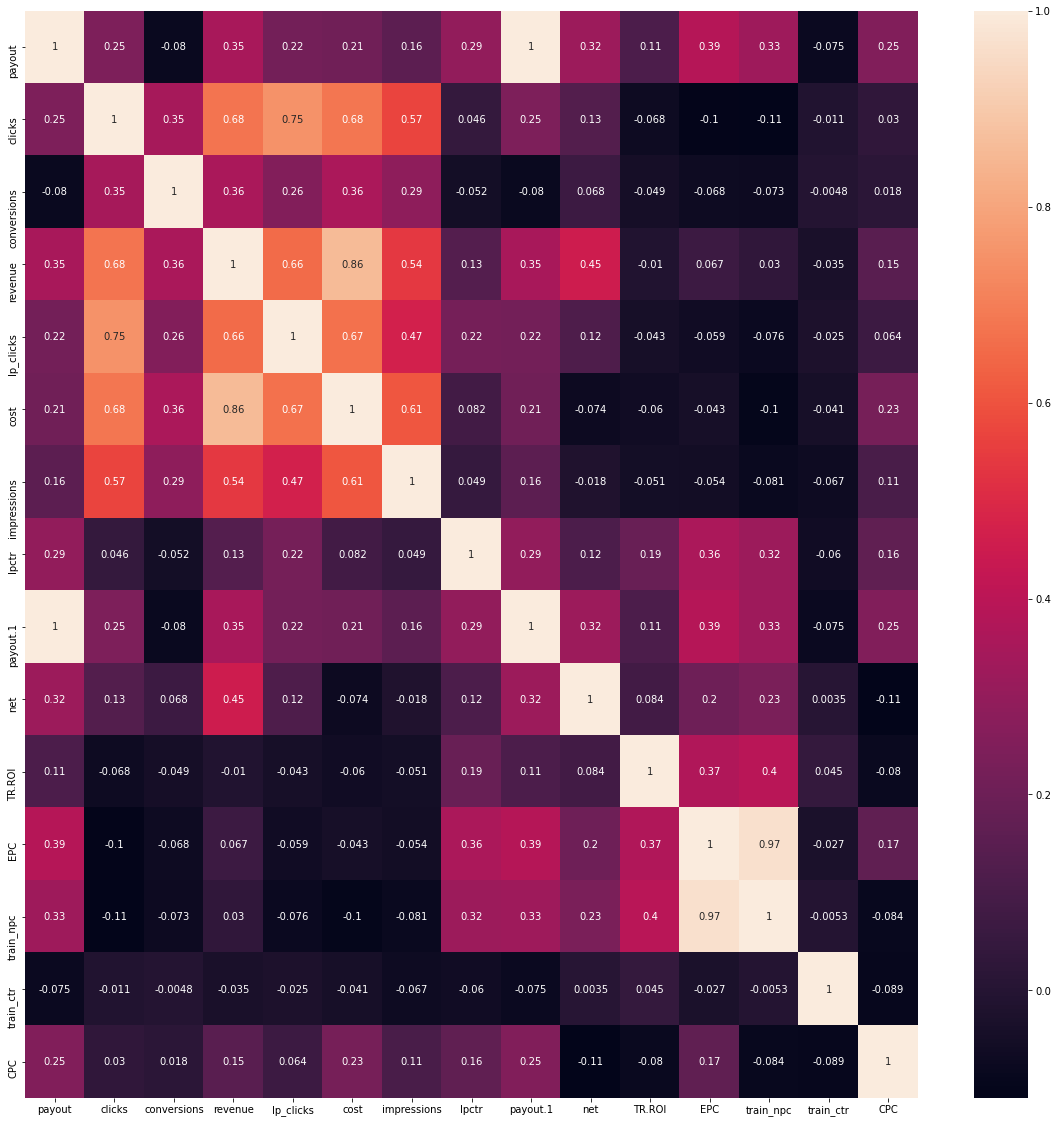

In [192]:
def plotCorr(df_test):
    plt.figure(figsize=(20,20))
    sns.heatmap(df_test.corr(), annot=True)
    plt.show()

plotCorr(df_test)

In [193]:
x=df_test[['clicks', 'lp_clicks','revenue', 'impressions', 'net', 'TR.ROI', 'EPC','train_ctr','train_npc','CPC']]
y=df_test[['predictions_class']]

In [194]:
pca=PCA(n_components=2)# trasnforma cate dimensiuni avem in doar 2 dimensiuni
pca.fit(x)
x_pca=pca.transform(x)

In [195]:
print(pca.explained_variance_ratio_)

[9.99998576e-01 1.26807515e-06]


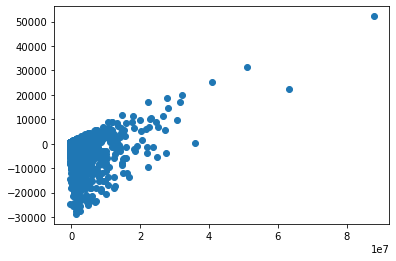

In [196]:
plt.scatter(x_pca[:,0], x_pca[:,1])

In [197]:
kmeans=KMeans(n_clusters = 3, random_state = 0).fit(x_pca)

In [198]:
kmeans_classes=kmeans.predict(x_pca)

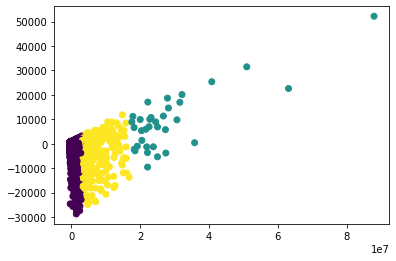

In [199]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_classes)

In [200]:

 le = preprocessing.LabelEncoder() 
y = y.values.reshape(1,-1)[0] 
#y[y == 'no_changes'] = 'no_sugg' 
#y[y == 'increase'] = 'increase' 
#y[y == 'decrease'] = 'decrease' 
#y[y == 'stop'] = 'stop'


y = le.fit_transform(y) #check for nuLts 
nans = df_test.isnull().sum() 


In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 
x_train 



,clicks,lp_clicks,revenue,impressions,net,TR.ROI,EPC,train_ctr,train_npc,CPC
19142,574,57,44.00,102178,-39.50,-0.473054,0.076655,0.005618,-0.068815,0.145470
108051,1858,165,1176.00,265011,760.65,1.831347,0.632939,0.007011,0.409392,0.223547
1786,6,0,0.18,1955,-0.04,-0.181818,0.030000,0.003069,-0.006667,0.036667
52238,966,227,84.00,128390,-90.17,-0.517713,0.086957,0.007524,-0.093344,0.180300
61884,194,48,90.00,64687,25.00,0.384615,0.463918,0.002999,0.128866,0.335052
...,...,...,...,...,...,...,...,...,...,...
27735,59,0,4.00,30107,-12.23,-0.753543,0.067797,0.001960,-0.207288,0.275085
26439,36,6,16.00,4141,7.73,0.934704,0.444444,0.008694,0.214722,0.229722
3125,9,0,0.21,1865,-0.05,-0.192308,0.023333,0.004826,-0.005556,0.028889
42480,253,20,105.00,127610,58.75,1.270270,0.415020,0.001983,0.232213,0.182806


In [202]:
print(y_test)

[0 2 2 ... 3 3 2]


In [203]:
print(y_pred)

[3 3 3 ... 3 3 3]


In [213]:
a=ADASYN()
x_res, y_res=x_train,y_train
#a.fit_resample(x_train, y_train)
#scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

ValueError: No samples will be generated with the provided ratio settings.

In [205]:
model=tree.DecisionTreeClassifier()

In [206]:
model.fit(x_res,y_res)

DecisionTreeClassifier()

In [207]:
y_pred=model.predict(x_test)

In [208]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [209]:
print(confusion_matrix)

[[ 126    4   98  179]
 [   4   51   22    1]
 [  97   13 1504  249]
 [ 202    2  268 1845]]


In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.31      0.30       407
           1       0.73      0.65      0.69        78
           2       0.79      0.81      0.80      1863
           3       0.81      0.80      0.80      2317

    accuracy                           0.76      4665
   macro avg       0.66      0.64      0.65      4665
weighted avg       0.76      0.76      0.76      4665



In [211]:
predictions = pd.DataFrame({'true_y_values': y_test, 'predicted_y_values': y_pred})

In [212]:
predictions

,true_y_values,predicted_y_values
0,0,3
1,2,3
2,2,0
3,3,3
4,2,2
...,...,...
4660,3,0
4661,2,3
4662,3,3
4663,3,0


In [860]:
####MIHAI####

In [121]:
X=df_test[['clicks', 'lp_clicks','revenue', 'impressions', 'net', 'TR.ROI', 'EPC','train_ctr','train_npc']]
y=df_test[['predictions_class']]

In [122]:
le = preprocessing.LabelEncoder()
y = y.values.reshape(1,-1)[0]
y = le.fit_transform(y)

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
from sklearn.metrics import confusion_matrix

In [155]:
a = ADASYN()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_res, y_res = X_train, y_train 
#a.fit_resample(X_train, y_train)
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)


In [146]:
model_crf = RandomForestClassifier()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
model_crf.fit(X_res,y_res)

RandomForestClassifier()

In [149]:
y_pred = model_crf.predict(X_test)

In [150]:
cfm=confusion_matrix(y_test.tolist(),y_pred.tolist())

In [142]:
print(confusion_matrix(y_test,y_pred))

[[ 112    1   79  215]
 [   1   52   21    4]
 [  36    9 1555  263]
 [  83    2  159 2073]]


In [143]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.28      0.35       407
           1       0.81      0.67      0.73        78
           2       0.86      0.83      0.85      1863
           3       0.81      0.89      0.85      2317

    accuracy                           0.81      4665
   macro avg       0.74      0.67      0.69      4665
weighted avg       0.80      0.81      0.80      4665

0.8128617363344052


In [ ]:
###emanuel###

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
#logistic regression model
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_lreg = LogisticRegression()
model_lreg.fit(X_res, y_res)
y_pred = model_lreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    1  406]
 [   0    0    1   77]
 [   4    0    6 1853]
 [   8    0   18 2291]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       407
           1       0.00      0.00      0.00        78
           2       0.23      0.00      0.01      1863
           3       0.50      0.99      0.66      2317

    accuracy                           0.49      4665
   macro avg       0.18      0.25      0.17      4665
weighted avg       0.34      0.49      0.33      4665



C:\Users\drdia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
